### Задача 2. Определение мошенничества с кредитными картами
Набор данных: [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

Logistic Regression - Accuracy: 0.9996
Logistic Regression - Recall: 1.0000
Logistic Regression - Precision: 0.9991
Logistic Regression - Confusion Matrix:
[[1159    1]
 [   0 1116]]

SVM - Accuracy: 1.0000
SVM - Recall: 1.0000
SVM - Precision: 1.0000
SVM - Confusion Matrix:
[[1160    0]
 [   0 1116]]

Random Forest - Accuracy: 1.0000
Random Forest - Recall: 1.0000
Random Forest - Precision: 1.0000
Random Forest - Confusion Matrix:
[[1160    0]
 [   0 1116]]

Gradient Boosting - Accuracy: 1.0000
Gradient Boosting - Recall: 1.0000
Gradient Boosting - Precision: 1.0000
Gradient Boosting - Confusion Matrix:
[[1160    0]
 [   0 1116]]

Neural Network - Accuracy: 1.0000
Neural Network - Recall: 1.0000
Neural Network - Precision: 1.0000
Neural Network - Confusion Matrix:
[[1160    0]
 [   0 1116]]

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.4s
[CV] END .........................C=0.1, gamma=1, ker

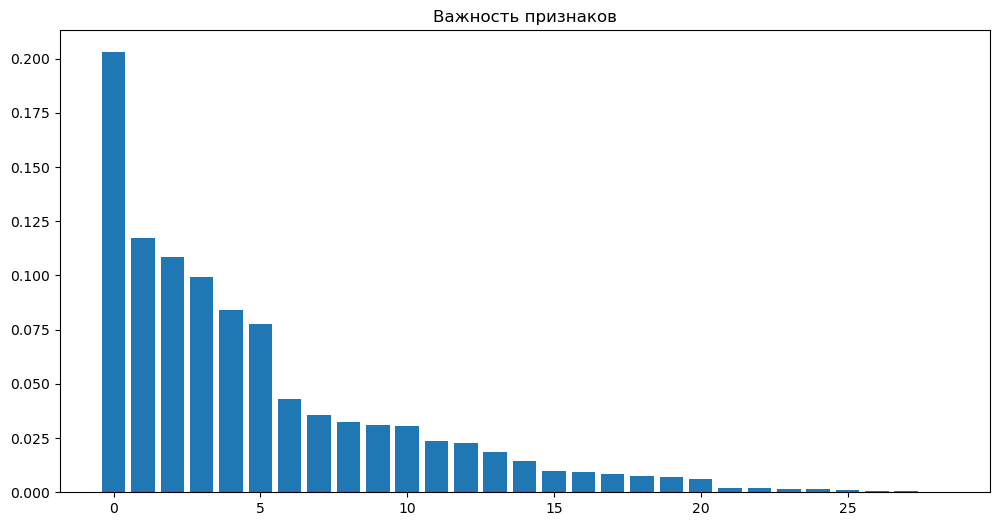

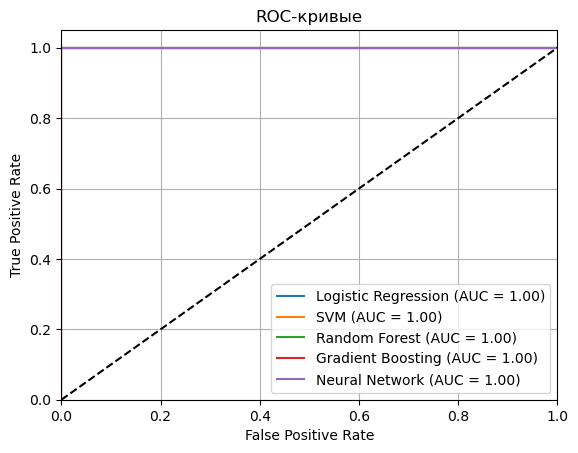

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/creditcard.csv")

df_reduced = df.sample(frac=0.02, random_state=42)

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
df_reduced['Amount'] = scaler.fit_transform(df_reduced[['Amount']])

X = df_reduced.drop(['Time', 'Class'], axis=1)
y = df_reduced['Class']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_res, y_res)

from sklearn.svm import SVC

svm_clf = SVC(probability=True)
svm_clf.fit(X_res, y_res)

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_res, y_res)

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_res, y_res)

from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, alpha=1e-4,
                        solver='sgd', random_state=42, learning_rate_init=.1)
mlp_clf.fit(X_res, y_res)

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

models = {
    "Logistic Regression": log_reg,
    "SVM": svm_clf,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    "Neural Network": mlp_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(f"{name} - Recall: {recall:.4f}")
    print(f"{name} - Precision: {precision:.4f}")
    print(f"{name} - Confusion Matrix:\n{cm}\n")

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_res, y_res)
print(f"Лучшие параметры: {grid.best_params_}")
print(f"Лучший результат: {grid.best_score_}")

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-3, 2, 6),
    'kernel': ['rbf', 'poly', 'sigmoid']
}

random_search = RandomizedSearchCV(SVC(), param_dist, n_iter=50, refit=True, verbose=2, random_state=42)
random_search.fit(X_res, y_res)
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший результат: {random_search.best_score_}")

import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Важность признаков")
plt.bar(range(X_res.shape[1]), importances[indices], align="center")
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()